<a href="https://colab.research.google.com/github/srosamont/Projects_Ironhack/blob/master/NYC_ride_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# Lire fichier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path="/content/drive/My Drive/Data/train_2014.csv"

In [14]:
%%time

df_2014=pd.read_csv(path)


CPU times: user 16.6 s, sys: 2.57 s, total: 19.2 s
Wall time: 22.1 s


CPU times: user 15.2 s, sys: 2.45 s, total: 17.7 s
Wall time: 22.1 s


In [15]:
%%time
import pickle
filename = 'fichier2014lu.sav'
pickle.dump(df_2014, open(filename, 'wb'))


CPU times: user 6.52 s, sys: 1.7 s, total: 8.22 s
Wall time: 10 s


In [3]:
#Unpickle
import pickle
df_2014=pickle.load( open('fichier2014lu.sav', "rb" ) )


EOFError: ignored

In [16]:
df_2014.shape


(8252682, 8)

In [17]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252682 entries, 0 to 8252681
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 503.7+ MB


In [18]:
df_2014.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

In [19]:
#deleting 4 rows with missing values in dropoff columns.
df_2014.dropna(axis=0,inplace=True)

In [20]:
df_2014.drop_duplicates(inplace=True)

In [21]:
df_2014.pickup_datetime.unique() #df_2013.pickup_datetime.unique()

array(['2014-02-19 07:22:00 UTC', '2014-12-06 20:36:22 UTC',
       '2014-02-19 16:03:00 UTC', ..., '2014-07-31 09:06:06 UTC',
       '2014-05-02 07:36:20 UTC', '2014-03-04 22:25:01 UTC'], dtype=object)

In [22]:
%%time
df_2014['date']=pd.to_datetime(df_2014['pickup_datetime'])

CPU times: user 16min 47s, sys: 154 ms, total: 16min 48s
Wall time: 16min 48s


In [23]:
#Creer un fichier pickle pour sauver 
filename1 = 'fichier2014datetransformed.sav'
pickle.dump(df_2014, open(filename1, 'wb'))

In [31]:
#Unpickle

df_2014=pickle.load( open('fichier2014datetransformed.sav', "rb" ) )

In [32]:
%%time
# Month of year
df_2014['month'] = df_2014['date'].dt.month_name()
# Week of year
df_2014['week_nb'] = df_2014['date'].dt.week
# Day of week
df_2014['weekday'] = df_2014['date'].dt.day_name()
# Day of year (quantieme)
df_2014['day_nb'] = df_2014['date'].dt.dayofyear
# Hour of the day 
df_2014['hour'] = df_2014['date'].dt.hour
# Day of the month
df_2014['Month_day'] = df_2014['date'].dt.day

CPU times: user 8.9 s, sys: 706 ms, total: 9.61 s
Wall time: 9.61 s


In [33]:
df_2014['week_nb'].unique().size

52

In [34]:
df_2014['weekday'].unique()

array(['Wednesday', 'Saturday', 'Thursday', 'Friday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [35]:
df_2014['month'].unique()

array(['February', 'December', 'July', 'May', 'January', 'April', 'June',
       'March', 'October', 'November', 'September', 'August'],
      dtype=object)

In [36]:
df_2014['day_nb'].unique().size

365

In [37]:
df_2014.pickup_longitude.value_counts()
#drop longitudes at 0 (greenwich meridians)
#drop latitudes at 0 (Eaquateur)

 0.000000     164201
-73.982220       917
-73.982140       908
-73.982310       867
-73.982130       866
               ...  
-73.869446         1
-73.935113         1
-73.898072         1
-73.794746         1
-73.930103         1
Name: pickup_longitude, Length: 158297, dtype: int64

In [26]:
#drop latitudes at 0 (Equateur)
df_2014.pickup_latitude.value_counts()

0.000000     164201
40.759360       942
40.758277       892
40.758282       878
40.758187       851
              ...  
40.664545         1
40.813369         1
40.633295         1
40.844619         1
40.701961         1
Name: pickup_latitude, Length: 178806, dtype: int64

In [38]:
df_2014=df_2014[df_2014.pickup_latitude!=0]

In [39]:
df_2014.pickup_longitude.value_counts()

-73.982220    917
-73.982140    908
-73.982310    867
-73.982130    866
-73.982320    859
             ... 
-74.078191      1
-73.696833      1
-73.806208      1
-73.792092      1
-73.895418      1
Name: pickup_longitude, Length: 158296, dtype: int64

In [41]:
df_2014=df_2014[df_2014.dropoff_latitude!=0]

In [45]:
df_2014.pickup_latitude.value_counts()

40.759360    930
40.758277    878
40.758282    871
40.758187    839
40.758457    827
            ... 
40.680671      1
40.833605      1
40.852722      1
40.647713      1
40.649535      1
Name: pickup_latitude, Length: 178585, dtype: int64

In [48]:
df_2014.passenger_count.value_counts()

1    5681525
2    1128414
5     455691
3     340840
6     301150
4     165332
9          9
7          6
8          3
Name: passenger_count, dtype: int64

In [35]:
#remove rides with 208 passengers . It is certainly an error. removed while rempving the matitude and longitude at 0
df_2014=df_2014[df_2014.passenger_count!=208]

In [47]:
#remove rides with 0 passenger even if they may be rides to transfer parcels or documents
df_2014=df_2014[df_2014.passenger_count!=0]

In [50]:
df_2014.fare_amount.value_counts()

6.50      393717
6.00      390405
7.00      385514
5.50      377676
7.50      373789
           ...  
49.51          1
164.45         1
49.99          1
54.01          1
13.30          1
Name: fare_amount, Length: 3012, dtype: int64

In [51]:
df_2014.fare_amount.max()

500.0

In [52]:
df_2014.fare_amount.min()

0.0

In [55]:
# drop the 10 occurences with a 0 amount
df_2014=df_2014[df_2014.fare_amount!=0]

In [56]:
df_2014[df_2014.fare_amount==500.0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day
6560865,2014-01-29 01:52:34.0000001,500.0,2014-01-29 01:52:34 UTC,-73.977378,40.742028,-73.977378,40.742028,1,2014-01-29 01:52:34+00:00,January,5,Wednesday,29,1,29
6987748,2014-03-18 09:39:22.0000003,500.0,2014-03-18 09:39:22 UTC,-73.851255,40.726820,-73.851255,40.726820,1,2014-03-18 09:39:22+00:00,March,12,Tuesday,77,9,18


In [ ]:
%%time
filename = 'fichier2014lu.sav'
pickle.dump(df_2014, open(filename, 'wb'))
filename2 = 'fichier2014lu.sav'
pickle.dump(df_2013, open(filename2, 'wb'))

In [57]:
%%time
df_2014.to_csv('/content/drive/My Drive/Data/train_2014Clean.csv')

In [58]:
#Creer un fichier pickle pour sauver dataframe 2014 clean
filename2 = 'dataFrame2014clean.sav'
pickle.dump(df_2014, open(filename2, 'wb'))

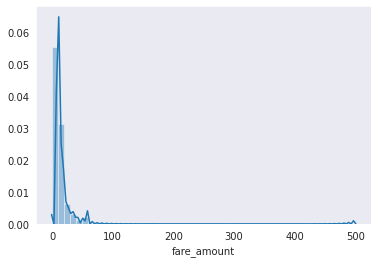

In [59]:
# Plot distribution of fare_amount
sns.distplot(df_2014['fare_amount'])
# fare mount is kind of log normal distribution

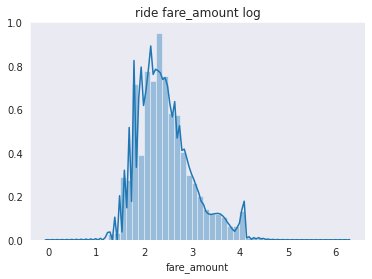

In [61]:
sns.distplot(np.log1p(df_2014['fare_amount']))
plt.title('ride fare_amount log')
plt.show()

# Distance calculation

In [62]:
# distance calculation with Haversine formula
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

In [63]:
df_2014['distance_KM']=haversine_np(df_2014['pickup_longitude'],df_2014['pickup_latitude'],df_2014['dropoff_longitude'],df_2014['dropoff_latitude'])

In [64]:
df_2014['distance_KM'].value_counts()

0.000000    51238
0.000111      169
0.000111      133
0.000222       83
0.000222       49
            ...  
2.925962        1
1.373655        1
1.788609        1
1.104220        1
0.242485        1
Name: distance_KM, Length: 8020859, dtype: int64

In [66]:
# drop distance with 0km (same latitude and longitude)
df_2014=df_2014[df_2014['distance_KM']!=0]

In [67]:
#Creer un fichier pickle pour sauver dataframe 2014 clean with distance KM
filename3 = 'dataFrame2014cleanandKM.sav'
pickle.dump(df_2014, open(filename3, 'wb'))

In [3]:
#Unpickle
import pickle
df_2014=pickle.load( open('dataFrame2014cleanandKM.sav', "rb" ) )

In [4]:
#Add a column with weekend or not weekend in dataframe
dct_work={'Monday':1, 'Sunday':0, 'Tuesday':1, 'Wednesday':1, 'Saturday':0, 'Friday':1,
       'Thursday':1}
df_2014['working_days']=df_2014.weekday.map(dct_work)
#ranger jour dans le bon sens.     

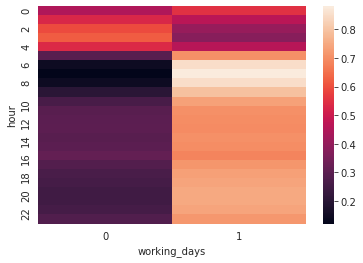

In [5]:
sns.heatmap(pd.crosstab(df_2014.hour,df_2014.working_days,normalize='index'))

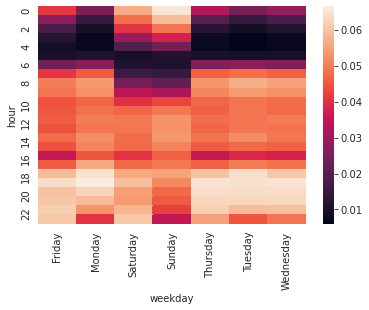

In [74]:
sns.heatmap(pd.crosstab(df_2014.hour,df_2014.weekday,normalize='columns'))
#repartition des courses pour chaque jour 0 lundi, 6 dimanche
# reprise des bus/metro à quel heure? 5h. heures fermeture bars/boite de nuit.

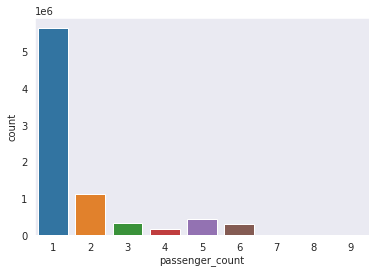

In [6]:
sns.countplot(df_2014.passenger_count)
# majority of 1 passenger - ride

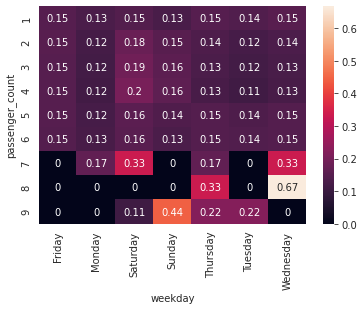

In [78]:
sns.heatmap(pd.crosstab(df_2014.passenger_count,df_2014.weekday,normalize='index'),annot=True)
# sur quels jour sont plutot les passager solo, duo, ou plus

In [82]:
## Pickup latidude vs.longitude

## Pickup latidude vs.longitude

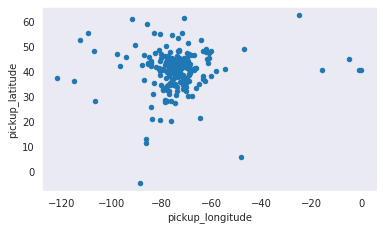

In [7]:
#aAin rides in Manhattan?,and someone went to Ney Jersey.?
ax=df_2014[["pickup_latitude", "pickup_longitude"]].plot.scatter(y="pickup_latitude", x="pickup_longitude")
ax.set_aspect('equal', 'box')
#some rides crosses the sea...

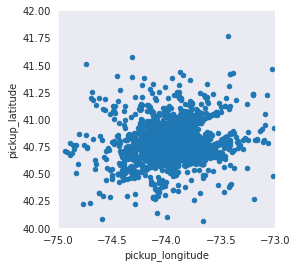

In [10]:
#Zoom

ax=df_2014[["pickup_latitude", "pickup_longitude"]].plot.scatter(y="pickup_latitude", x="pickup_longitude")
ax.set_ylim(40, 42)
ax.set_xlim(-75, -73)
ax.set_aspect('equal', 'box')
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/axis_equal_demo.html

## Dropoff Latitude vs. Longitude

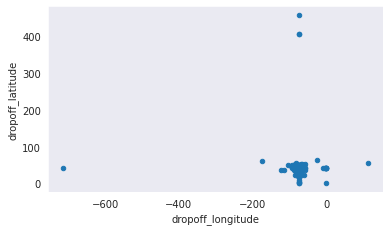

In [11]:

ax=df_2014[["dropoff_latitude", "dropoff_longitude"]].plot.scatter(y="dropoff_latitude", x="dropoff_longitude")
ax.set_aspect('equal', 'box')

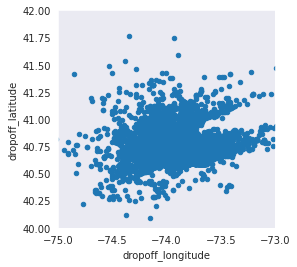

In [12]:
#Zoom

ax=df_2014[["dropoff_latitude", "dropoff_longitude"]].plot.scatter(y="dropoff_latitude", x="dropoff_longitude")
ax.set_ylim(40, 42)
ax.set_xlim(-75, -73)
ax.set_aspect('equal', 'box')
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/axis_equal_demo.html

In [89]:
df_2014.describe().round(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days
count,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000,8021722.000
mean,12.900,-73.975,40.750,-73.974,40.751,1.698,25.983,179.442,13.523,15.603,3.483,0.710
std,11.071,0.080,0.051,0.256,0.241,1.357,14.979,104.955,6.525,8.746,12.173,0.454
min,0.010,-121.926,-4.486,-714.400,0.080,1.000,1.000,1.000,0.000,1.000,0.000,0.000
25%,6.500,-73.992,40.736,-73.992,40.735,1.000,13.000,88.000,9.000,8.000,1.284,0.000
50%,9.500,-73.982,40.753,-73.980,40.754,1.000,25.000,175.000,14.000,15.000,2.185,1.000
75%,14.500,-73.968,40.767,-73.964,40.768,2.000,39.000,272.000,19.000,23.000,3.992,1.000
max,467.500,-0.017,62.653,112.436,458.650,9.000,52.000,365.000,23.000,31.000,8660.722,1.000


In [88]:
df_2014.fare_amount.max()

467.5

In [91]:
#there are outliers in  dropoff latitude,  we remove those above 400
df_2014=df_2014[df_2014.dropoff_latitude<400]

In [92]:
df_2014.dropoff_latitude.value_counts()

40.750150    482
40.774317    481
40.750152    472
40.750147    471
40.750127    469
            ... 
40.854973      1
40.881307      1
40.868693      1
40.816848      1
41.060205      1
Name: dropoff_latitude, Length: 243070, dtype: int64

In [ ]:
## definir borne latitude

In [13]:
#drop dropoff_latitude which is too small to be in NYC
df_2014=df_2014[df_2014.dropoff_latitude>39]

In [15]:

df_2014=df_2014[df_2014.dropoff_latitude<42]

In [16]:
df_2014=df_2014[df_2014.pickup_latitude<42]

In [17]:
df_2014=df_2014[df_2014.pickup_latitude>39]

## definir borne longitude

In [18]:
df_2014=df_2014[df_2014.dropoff_longitude>-76]

In [19]:
df_2014=df_2014[df_2014.dropoff_longitude<-72]

In [20]:
df_2014=df_2014[df_2014.pickup_longitude>-76]

In [21]:
df_2014=df_2014[df_2014.pickup_longitude<-72]

In [22]:
# Define the bounding box origin
BBox_origin= (df_2014.pickup_longitude.min(),   df_2014.pickup_longitude.max(),      
         df_2014.pickup_latitude.min(), df_2014.pickup_latitude.max())
BBox_origin

(-75.933769, -72.080297, 39.098057, 41.911770000000004)

In [23]:
# Define the bounding box dropoff
BBox_dropoff = (df_2014.dropoff_longitude.min(),   df_2014.dropoff_longitude.max(),      
         df_2014.dropoff_latitude.min(), df_2014.dropoff_latitude.max())
BBox_dropoff

(-75.64957199999999, -72.089938, 39.360003000000006, 41.857777)

In [24]:
df_2014.shape

(8021407, 17)

In [110]:
df_2014.describe().round(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days
count,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000,8021407.000
mean,12.900,-73.975,40.750,-73.974,40.751,1.698,25.983,179.442,13.523,15.603,3.438,0.710
std,11.071,0.036,0.027,0.035,0.032,1.357,14.979,104.955,6.525,8.746,3.777,0.454
min,0.010,-75.934,39.098,-75.650,39.360,1.000,1.000,1.000,0.000,1.000,0.000,0.000
25%,6.500,-73.992,40.736,-73.992,40.735,1.000,13.000,88.000,9.000,8.000,1.284,0.000
50%,9.500,-73.982,40.753,-73.980,40.754,1.000,25.000,175.000,14.000,15.000,2.185,1.000
75%,14.500,-73.968,40.767,-73.964,40.768,2.000,39.000,272.000,19.000,23.000,3.992,1.000
max,467.500,-72.080,41.912,-72.090,41.858,9.000,52.000,365.000,23.000,31.000,184.863,1.000


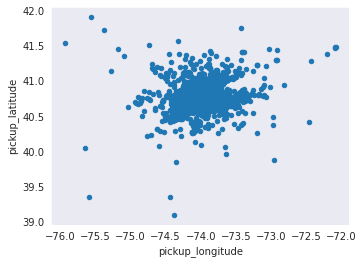

In [26]:
#Check pickup
ax=df_2014[["pickup_latitude", "pickup_longitude"]].plot.scatter(y="pickup_latitude", x="pickup_longitude")
ax.set_aspect('equal', 'box')

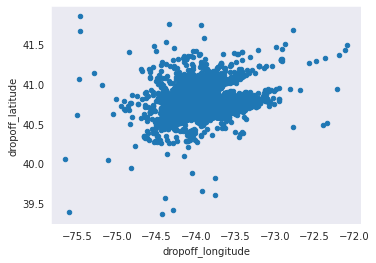

In [27]:
#check dropoff
ax=df_2014[["dropoff_latitude", "dropoff_longitude"]].plot.scatter(y="dropoff_latitude", x="dropoff_longitude")
ax.set_aspect('equal', 'box')

In [28]:
df_2014.to_csv('/content/drive/My Drive/Data/train_2014Clean2.csv')

In [ ]:
#Creer un fichier pickle pour sauver dataframe 2014 clean avec lat et long nettoyees
filename4 = 'dataFrame2014cleanLatlong.sav'
pickle.dump(df_2014, open(filename4, 'wb'))

In [29]:
df_2014.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days
fare_amount,1.000000,0.445673,-0.232288,0.314275,-0.171624,0.014585,0.027999,0.026901,-0.014754,0.002195,0.891292,0.012096
pickup_longitude,0.445673,1.000000,-0.079988,0.259029,0.054004,0.001852,0.015183,0.016233,0.017737,0.001833,0.474452,0.018587
pickup_latitude,-0.232288,-0.079988,1.000000,0.058829,0.410211,-0.007669,-0.001307,-0.001859,0.023823,-0.001812,-0.272360,0.044633
dropoff_longitude,0.314275,0.259029,0.058829,1.000000,0.126582,0.000588,0.007677,0.007735,-0.051338,0.001679,0.384428,0.001357
dropoff_latitude,-0.171624,0.054004,0.410211,0.126582,1.000000,-0.004891,0.001881,0.001532,0.018617,-0.000329,-0.158838,0.030221
passenger_count,0.014585,0.001852,-0.007669,0.000588,-0.004891,1.000000,-0.004110,-0.002932,0.012640,0.001994,0.013201,-0.028123
week_nb,0.027999,0.015183,-0.001307,0.007677,0.001881,-0.004110,1.000000,0.959153,-0.002106,0.030368,0.013511,0.001911
day_nb,0.026901,0.016233,-0.001859,0.007735,0.001532,-0.002932,0.959153,1.000000,-0.000913,0.069883,0.013320,0.002480
hour,-0.014754,0.017737,0.023823,-0.051338,0.018617,0.012640,-0.002106,-0.000913,1.000000,0.004971,-0.028481,0.093266
Month_day,0.002195,0.001833,-0.001812,0.001679,-0.000329,0.001994,0.030368,0.069883,0.004971,1.000000,0.002523,0.011416


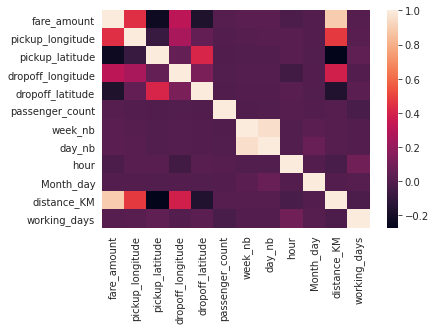

In [31]:
sns.heatmap(df_2014.corr())
#fare_amount is highly correlated to distance in KM what is a good point!
#more correlation between West -Est direction(longitude fare amount)

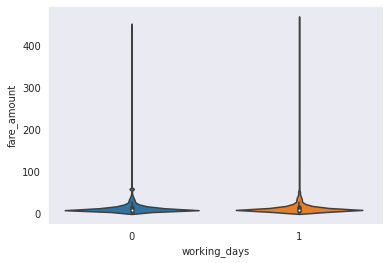

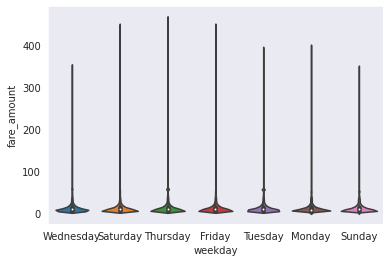

In [32]:
sns.violinplot(x = df_2014.working_days, y = df_2014.fare_amount, data = df_2014)
plt.show()
sns.violinplot(x = df_2014.weekday, y = df_2014.fare_amount, data = df_2014)

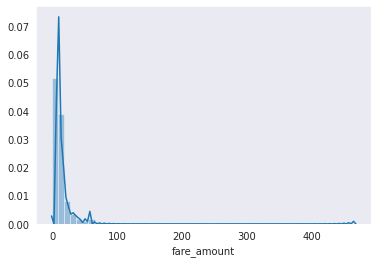

In [33]:
# Plot distribution of fare_amount
sns.distplot(df_2014['fare_amount'])
# fare mount is kind of log normal distribution

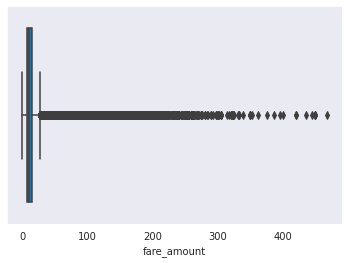

In [34]:
sns.boxplot(df_2014['fare_amount'])
#drop outliers on fare amount???

In [35]:
df2=df_2014[df_2014['fare_amount']<100]

In [36]:
df2.shape

(8017133, 17)

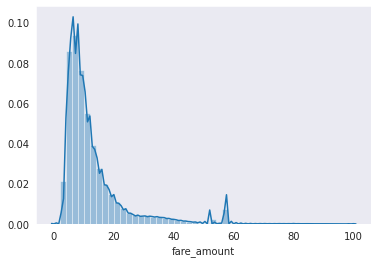

In [37]:
# Plot distribution of fare_amount after dropping amount>100$
sns.distplot(df2['fare_amount'])
# fare amount:
#around 56 dollars for JFK airport
#from 20 to 40 dollars for la Guardia airport



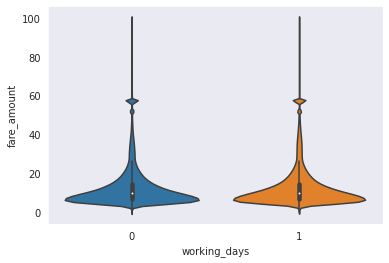

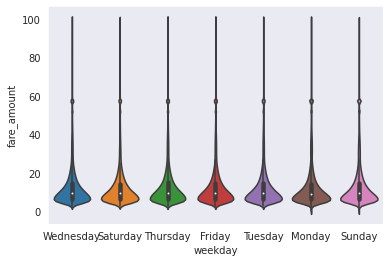

In [42]:
sns.violinplot(x = df2.working_days, y = df2.fare_amount, data = df2)
plt.show()
sns.violinplot(x = df2.weekday, y = df2.fare_amount, data = df2)